## An Exploration of UN data
This project is an exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. 
### Data Source:
 [http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD). 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read in Data

In [8]:
gdp = pd.read_csv('../Data/gdp_per_capita.csv')

### Dropping and Renaming Columns

In [11]:
gdp = gdp.drop(['Value Footnotes'], axis = 1)
gdp = gdp.rename(columns={'Country or Area':'Country','Value':'GDP'})

### Data frame dimensions and data types
* Find the number of rows and columns
* Find the data types of its columns
* Fix data types if necessary

In [14]:
row_count = gdp.shape[0]
col_count = gdp.shape[1]
print(f'There are {row_count:,} rows and {col_count:,} columns in the "gdp" data frame')

There are 7,662 rows and 3 columns in the "gdp" data frame


In [16]:
gdp['Year'] = gdp['Year'].astype(str)

In [18]:
gdp['Year'] = gdp['Year'].astype(str)
gdp.dtypes

Country     object
Year        object
GDP        float64
dtype: object

### Exploring the year 2021
* Create a new dataframe by subsetting `gdp` to just the year 2021
* Number of countries are represented in 2021
* Countries are least represented in the accross all years
* Why so few observations
* Use `.describe()` to find the summary statistics for GDP per capita in 2021.
* Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram).
* Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

In [21]:
gdp_2021 = gdp[gdp['Year'] == '2021']
unique_countries = gdp_2021['Country'].nunique()
print(f'In 2021 there were {unique_countries} represented')

In 2021 there were 241 represented


In [25]:
gdp_least_represented = gdp['Country'].value_counts().reset_index()
gdp_least_represented = gdp_least_represented.nsmallest(5, 'count')

In [35]:
least_represented_list = gdp_least_represented['Country']
years_in_lrl = gdp[gdp['Country'].isin(least_represented_list)]
#years_in_lrl.head(50)

In [50]:
#for country in least_represented_list

In [52]:
describe_2021 = gdp_2021['GDP'].describe().reset_index()
describe_2021 = describe_2021.rename(columns={'index':'Index'})
describe_2021

,Index,GDP
0,count,241.000000
1,mean,20711.570080
2,std,20916.978968
3,min,714.066712
4,25%,5044.196028
5,50%,13754.802423
6,75%,30974.370692
7,max,115683.493708


The shape of the distribution below is skewed to the right.

The shape of the distribution below is skewed to the right.


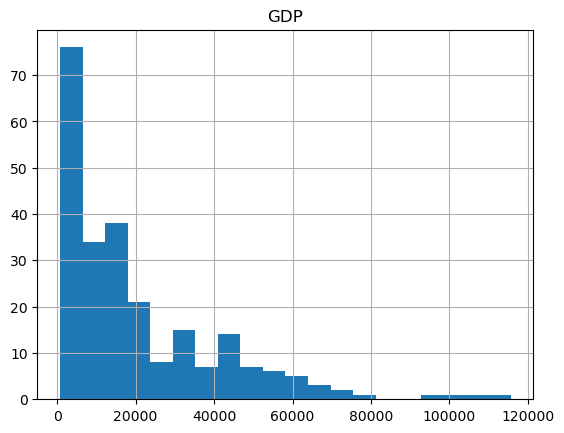

In [57]:
gdp_2021.hist(column='GDP',bins = 20)
print('The shape of the distribution below is skewed to the right.')

In [59]:
top_five_gdp_2021 = gdp_2021.nlargest(columns ='GDP',n= 5)
top_five_gdp_2021.head()

,Country,Year,GDP
4147,Luxembourg,2021,115683.493708
6107,Singapore,2021,107741.118436
3278,Ireland,2021,102785.490239
5745,Qatar,2021,92862.571798
680,Bermuda,2021,78570.489515


In [61]:
bottom_five_gdp_2021 = gdp_2021.nsmallest(columns ='GDP',n= 5)
bottom_five_gdp_2021.head()

,Country,Year,GDP
972,Burundi,2021,714.066712
1216,Central African Republic,2021,837.504686
1629,Dem. Rep. Congo,2021,1073.643271
6272,Somalia,2021,1136.735989
5073,Niger,2021,1186.576809


13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2021 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named `gdp_pivoted`.

In [ ]:
gdp_1990_2021 = gdp[(gdp['Year'] == 1990) | (gdp['Year'] == 2021)]
gdp_1990_2021.head()

In [ ]:
gdp_pivoted = pd.pivot_table(gdp_1990_2021, values='GDP', index=['Country'],

                       columns=['Year'], aggfunc="sum")

gdp_pivoted.head()

In [ ]:
gdp_pivoted.index.name

In [ ]:
null_list = gdp_pivoted.isna()
null_list = null_list[(null_list[1990] == True) | (null_list[2021] == True)]
null_list = null_list.index.to_list()

In [ ]:
# Create a boolean mask for countries that are not in null_list
mask = ~gdp_pivoted.index.isin(null_list)

# Filter the DataFrame using the mask
filtered_gdp_pivoted = gdp_pivoted[mask]
filtered_gdp_pivoted

14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [ ]:
filtered_gdp_pivoted['Percent_Change'] = ((filtered_gdp_pivoted[2021] - filtered_gdp_pivoted[1990])/filtered_gdp_pivoted[1990])*100
filtered_gdp_pivoted.head()

15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [ ]:
negative_growth = filtered_gdp_pivoted[filtered_gdp_pivoted['Percent_Change'] <0]
negative_growth.sort_values(by = 'Percent_Change')

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?

**Bonus:** Put both line charts on the same plot. 

In [ ]:
first_percent_change = filtered_gdp_pivoted.nlargest(1, 'Percent_Change')
first_percent_change

In [ ]:
second_percent_change = filtered_gdp_pivoted.nlargest(2, 'Percent_Change')
second_percent_change

In [ ]:
eqg_china = gdp[(gdp['Country'] == 'Equatorial Guinea') | (gdp['Country'] == 'China')]
eqg_china = eqg_china.reset_index()
eqg_china

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
sns.lineplot(x = 'Year', y = 'GDP', data = eqg_china, hue = 'Country')

17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

In [ ]:
continents = pd.read_csv('../data/continents.csv')
continents.head()

18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [ ]:
gdp_continents = pd.merge(gdp, continents, on = 'Country', how = 'inner')
gdp_continents.head()

19. Determine the number of countries per continent. Create a bar chart showing this.

In [ ]:
countries_per_continent = gdp_continents.groupby('Continent')['Country'].nunique().reset_index(name = 'Country_Count')
countries_per_continent.head()

20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

In [ ]:
plt.bar(countries_per_continent.Continent,
        countries_per_continent.Country_Count)
plt.ylabel('Count')
plt.xlabel('Continent')
plt.title('Countries by Continent')
plt.xticks(rotation = 90)
plt.show()

21. Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`. Note: When reading this dataset it, you may encounter an error. Modify your `read_csv` call to correct this **without modifying the original csv file**.

In [ ]:
le = pd.read_csv('../data/life_exp.csv')
le.head()

22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use [`.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

In [ ]:
le = le.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

In [ ]:
le.head()

In [ ]:
le_melt = pd.melt(le, id_vars = 'Country Name', var_name = 'Year', value_name = 'Life_exp')
le_melt = le_melt.rename(columns = {'Country Name' : 'Country'})
le_melt.head()

In [ ]:
le_melt.dtypes

In [ ]:
gdp['Year'] = gdp['Year'].astype(str)

23. What was the first country with a life expectancy to exceed 80?

In [ ]:
first_to_eighty = le_melt[le_melt['Life_exp'] >= 80]
first_to_eighty_filtered = first_to_eighty[first_to_eighty['Year'] == first_to_eighty['Year'].min()]
first_to_eighty_filtered.head()

24. Merge `gdp_df` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [ ]:
gdp_le = pd.merge(gdp, le_melt, on = ['Country','Year'], how = 'inner')
gdp_le.head()

In [ ]:
from openpyxl import load_workbook
from openpyxl.styles import NamedStyle

In [ ]:
gdp_le.to_excel('gdp_le.xlsx', index=False, engine='openpyxl')

25. Create a new DataFrame, named `gdp_le_2021` by extracting data for the year 2021 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2021?

In [ ]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == '2021']
gdp_le_2021.head()

In [ ]:
count_of_eighty = gdp_le_2021[gdp_le_2021['Life_exp']>=80]
count_of_eighty.shape

26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a [seaborn FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [ ]:
gdp_le_2021.nlargest(3,'GDP')

In [ ]:
top_three = ['Luxembourg','Singapore', 'Ireland']
gdp_top_three = gdp_le[gdp_le['Country'].isin(top_three)]
gdp_top_three.head()

In [ ]:
a = sns.FacetGrid(gdp_top_three, col = 'Country')
a.map(sns.scatterplot,'Life_exp','GDP')
a.add_legend();

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

In [ ]:
gdp_le_2021.plot(kind = 'scatter', x = 'GDP', y = 'Life_Exp', figsize = (8,6))
plt.title(' GDP v Life Exp');

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

In [ ]:
gdp_le_2021[['Life_exp','GDP']].corr()

29. Add a column to `gdp_le_2021` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

In [ ]:
gdp_le_2021['GDP_log'] = np.log(gdp_le_2021['GDP'])
gdp_le_2021.head()

In [ ]:
gdp_le_2021[['Life_exp','GDP_log']].corr()

### Bonus: Solo Exploration:
1. Choose and download another data set from the UN data [http://data.un.org/Explorer.aspx](http://data.un.org/Explorer.aspx) to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Report any interesting correlations or trends that you find. 
2.    If time allows, check out the plotly library to add additional interativity to your plots. [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).

In [ ]:
wmn_lbr = pd.read_csv('../Data/wmn_lbr.csv')
wmn_lbr.head()

In [ ]:
wmn_lbr = wmn_lbr.drop(columns = ['Subgroup', 'Source', 'Unit', 'Value Footnotes'])
wmn_lbr = wmn_lbr.rename(columns = {'Country or Area' : 'Country','Value' : 'Wmn_Lbr_Pct'})
wmn_lbr.head()

In [ ]:
wmn_lbr['Year'] = wmn_lbr['Year'].astype(str)
wmn_lbr['Year'] = wmn_lbr['Year'].str.replace('.0',' ')
wmn_lbr.head()

In [ ]:
wmn_lbr.dtypes

In [ ]:
gdp_le['Year'] = gdp_le['Year'].astype(str)

In [ ]:
wmn_gdp = pd.merge(wmn_lbr,gdp_le, on = ['Country','Year'], how = 'inner')
wmn_gdp.head(2)

In [ ]:
wmn_gdp = pd.merge(wmn_gdp, continents, on = 'Country', how = 'inner')
wmn_gdp.head()

In [ ]:
wmn_gdp[['Wmn_Lbr_Pct','GDP']].corr()
#gdp_le_2021[['Life_exp','GDP_log']].corr()

In [ ]:
wmn_gdp[['Wmn_Lbr_Pct','Life_exp']].corr()

In [ ]:
for continent in wmn_gdp['Continent'].unique():
    subset = wmn_gdp[wmn_gdp['Continent'] == continent]
    correlation = subset[['Wmn_Lbr_Pct', 'GDP']].corr()
    print(continent)
    print(correlation)
    print("\n")

In [ ]:
correlation = subset[['Wmn_Lbr_Pct', 'GDP']].corr()
correlation

In [ ]:
asia = wmn_gdp[wmn_gdp['Continent'] == 'Asia']
asia.head()

In [ ]:
for country in asia['Country'].unique():
    subset = asia[asia['Country'] == country]
    correlation = subset[['Wmn_Lbr_Pct', 'GDP']].corr()
    print(country)
    print(correlation)
    print("\n")

In [ ]:
results = []

for country in wmn_gdp['Country'].unique():
    subset = wmn_gdp[wmn_gdp['Country'] == country]
    correlation = subset[['Wmn_Lbr_Pct', 'GDP']].corr().iloc[0, 1]  
    results.append({'Country': country, 'Correlation': correlation})  


correlation_country = pd.DataFrame(results)


print(correlation_country)

In [ ]:
correlation_country = pd.merge(correlation_country, continents, on = ['Country'], how = 'inner')
correlation_country.head()

In [ ]:
correlation_asia_sorted = correlation_asia.sort_values(by='Correlation', ascending=False)

sns.barplot(data=correlation_asia_sorted, x='Country', y='Correlation', hue='Country', palette='Set1')
plt.xticks(rotation=90)
plt.title("Women in Labor Force vs. GDP in Asia (by Country)")
plt.show()

In [ ]:
correlation_country.hist(column='Correlation',bins =10)

In [ ]:
correlation_country['Correlation'].describe()

In [ ]:
sns.boxplot(y='Continent', x='Correlation', data=correlation_country, hue='Continent', palette='Set1')


plt.title('Box Plot of Correlation by Continent')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Continent')


plt.show()